<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/DZ_22_claster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
missing_values = df.isnull().sum()

# Виведення результату
print(missing_values)

# Загальна кількість пропущених значень
total_missing = missing_values.sum()
print(f"Загальна кількість пропущених значень: {total_missing}")

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64
Загальна кількість пропущених значень: 0


In [3]:
df = df.drop('ID', axis=1)
print(df.columns)

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data)

KMeans(n_clusters=3)

In [6]:
kmeans.inertia_

863.0888301769872

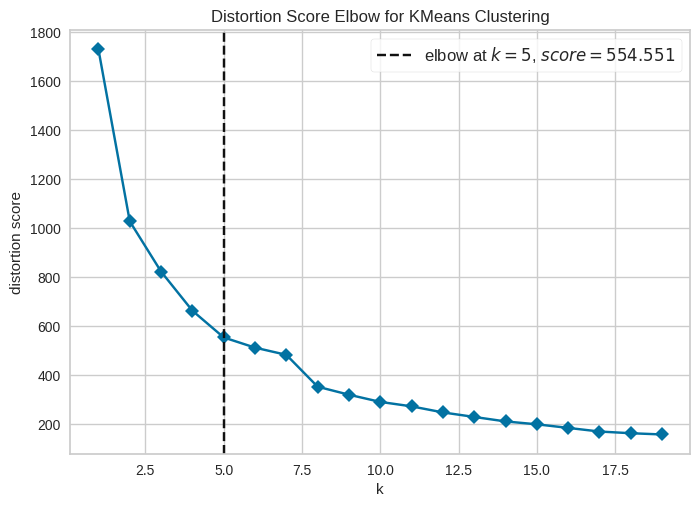

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

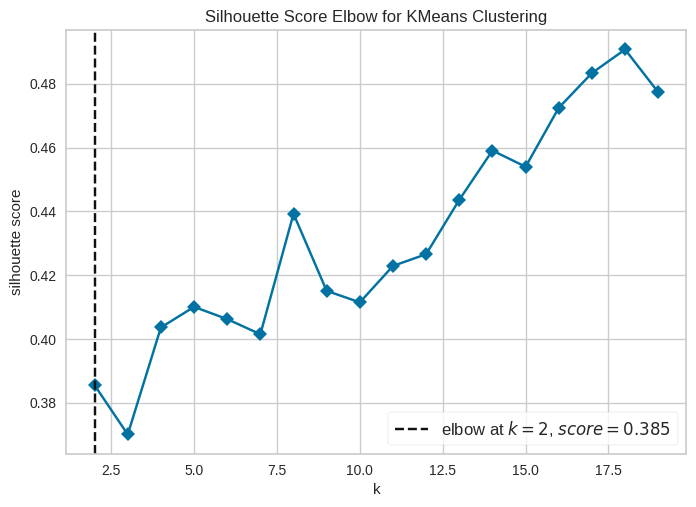

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 20),
                              timings=False,
                              metric='silhouette', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

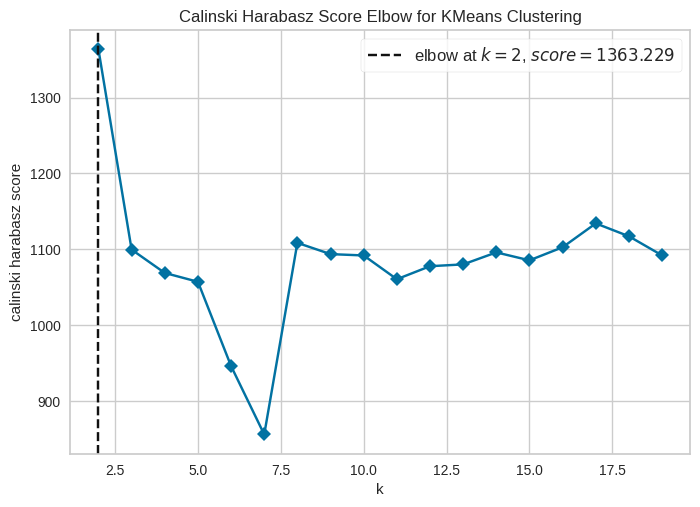

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 20),
                              timings=False,
                              metric='calinski_harabasz', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

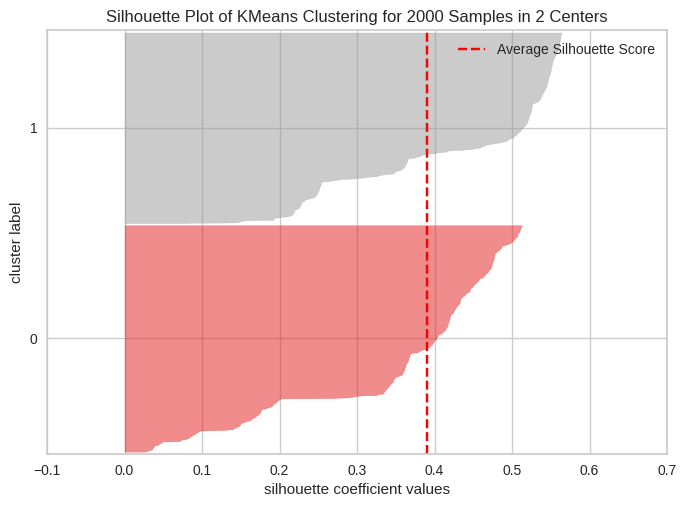

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data)
visualizer.show()

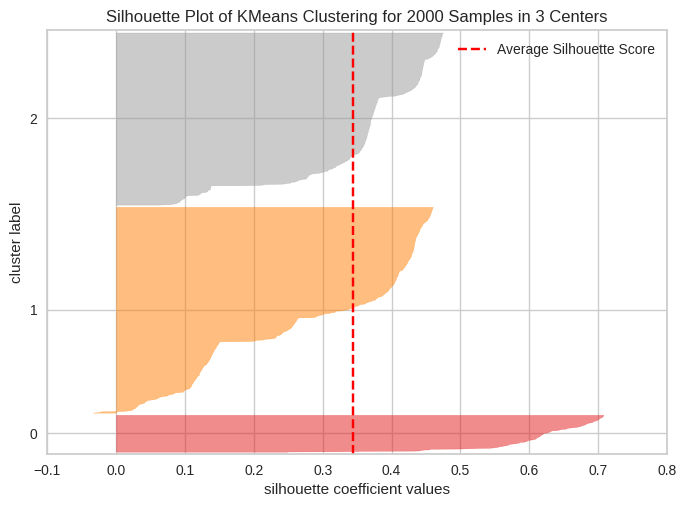

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data)
visualizer.show()

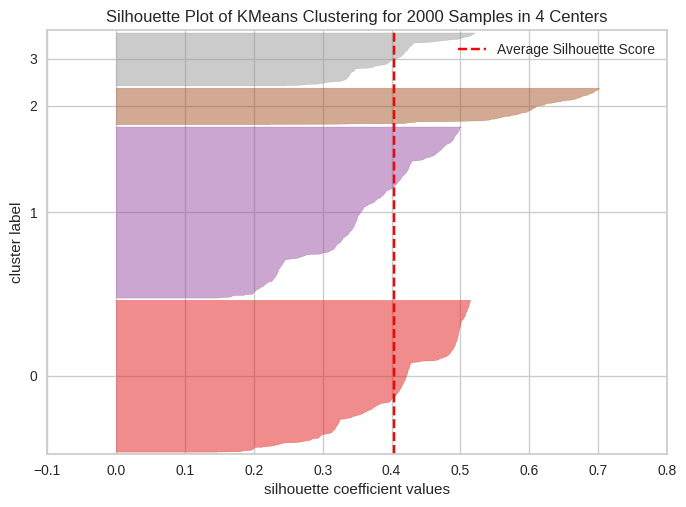

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(4))
visualizer.fit(data)
visualizer.show()

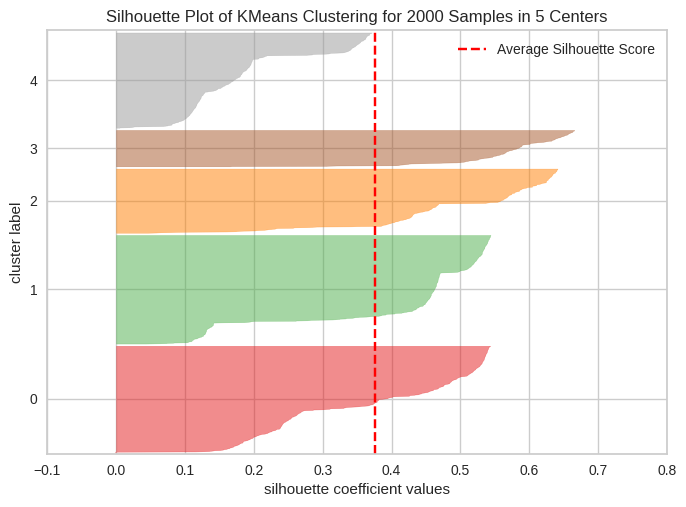

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data)
visualizer.show()

In [15]:
kmeans = KMeans(2)

kmeans.fit(data)

df['Cluster'] = kmeans.labels_

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [16]:
df['Cluster'].value_counts()

,count
Cluster,
0,1036
1,964


In [17]:
results = df.groupby(by='Cluster').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.000000,0.199807,38.119691,0.890927,129974.680502,0.973938,1.009653
1,0.948133,0.815353,33.533195,1.196058,111260.445021,0.634855,0.448133


<Axes: xlabel='Cluster'>

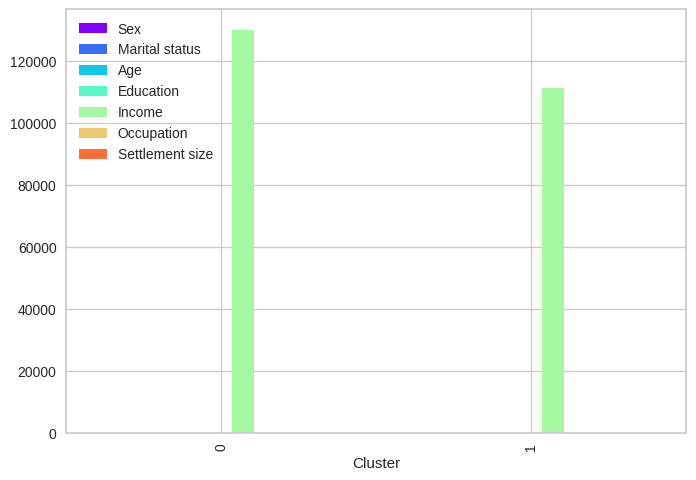

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [20]:
!pip install -q kneed

0.07767293786972235


<Figure size 500x500 with 0 Axes>

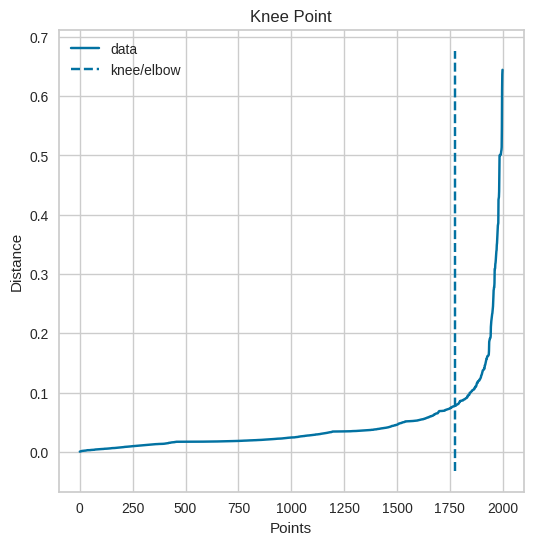

In [21]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,-1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


print(distances[knee.knee])

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.07, min_samples=5)

dbscan.fit(data)

DBSCAN(eps=0.07)

In [44]:
df['Cluster'] = dbscan.labels_

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Outlier
0,0,0,67,2,124670,1,2,0,-1
1,1,1,22,1,150773,1,2,1,-1
2,0,0,49,1,89210,0,0,2,-1
3,0,0,45,1,171565,1,1,3,-1
4,0,0,53,1,149031,1,1,3,-1


In [45]:
df['Cluster'].value_counts()

,count
Cluster,
-1,362
7,171
4,158
6,130
3,105
2,99
11,93
14,63
41,62


In [46]:
results = df.groupby(by='Cluster').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Outlier
Cluster,,,,,,,,
-1,0.406077,0.571823,43.375691,1.450276,159569.687845,1.19337,1.063536,-1.000000
0,0.000000,0.000000,64.272727,2.000000,124208.090909,1.00000,2.000000,-1.000000
1,1.000000,1.000000,26.362069,1.000000,115821.620690,1.00000,2.000000,-1.000000
2,0.000000,0.000000,40.575758,1.000000,92000.959596,0.00000,0.000000,-1.000000
3,0.000000,0.000000,42.514286,1.000000,131400.323810,1.00000,1.000000,-1.000000
4,1.000000,1.000000,28.037975,1.000000,113145.481013,1.00000,0.000000,-0.810127
5,0.000000,0.000000,61.000000,2.000000,90640.857143,0.00000,0.000000,-1.000000
6,1.000000,1.000000,27.407692,1.000000,116104.423077,1.00000,1.000000,-1.000000
7,1.000000,1.000000,27.274854,1.000000,83996.415205,0.00000,0.000000,-0.578947


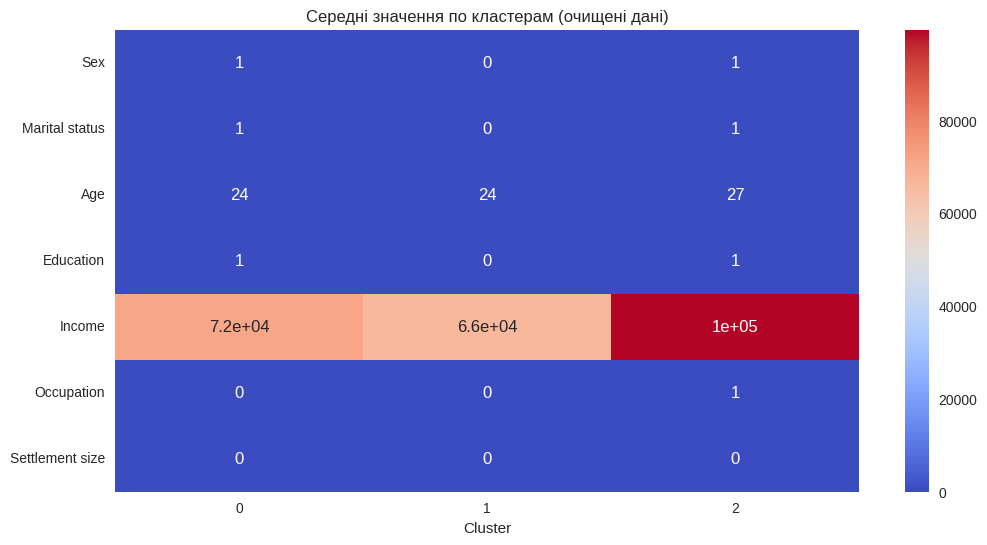

         Sex  Marital status        Age  Education        Income  Occupation  \
Cluster                                                                        
0        1.0             1.0  24.190476        1.0  71533.047619         0.0   
1        0.0             0.0  24.000000        0.0  66375.000000         0.0   
2        1.0             1.0  27.000000        1.0  99582.600000         1.0   

         Settlement size  
Cluster                   
0                    0.0  
1                    0.0  
2                    0.0  


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Масштабування даних
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Outlier'], axis=1))  # Видаляємо 'Outlier' для масштабування

# Використовуємо DBSCAN для видалення викидів
dbscan = DBSCAN(eps=0.07, min_samples=5)
df['Outlier'] = dbscan.fit_predict(df_scaled)

# Очищення даних від викидів
df_cleaned = df[df['Outlier'] != -1].drop(['Outlier'], axis=1)

# Масштабуємо очищені дані
df_cleaned_scaled = scaler.transform(df_cleaned)  # Масштабування очищених даних за допомогою попереднього scaler

# Повторна кластеризація
kmeans_cleaned = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans_cleaned.fit_predict(df_cleaned_scaled)

# Середні значення для очищених даних
cleaned_cluster_means = df_cleaned.groupby('Cluster').mean()

# Візуалізація для очищених даних
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Середні значення по кластерам (очищені дані)')
plt.show()
print(cleaned_cluster_means)




<Axes: xlabel='Cluster'>

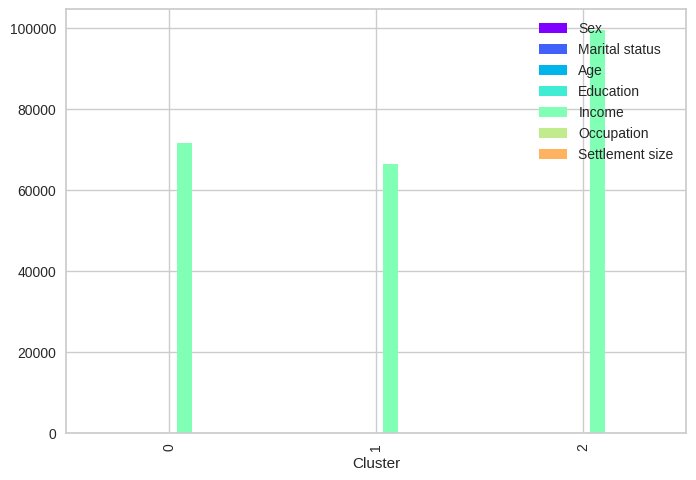

In [53]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

cleaned_cluster_means.plot(kind='bar', color=color)

For n_clusters = 6, The average silhouette_score is : 0.8233431822680546


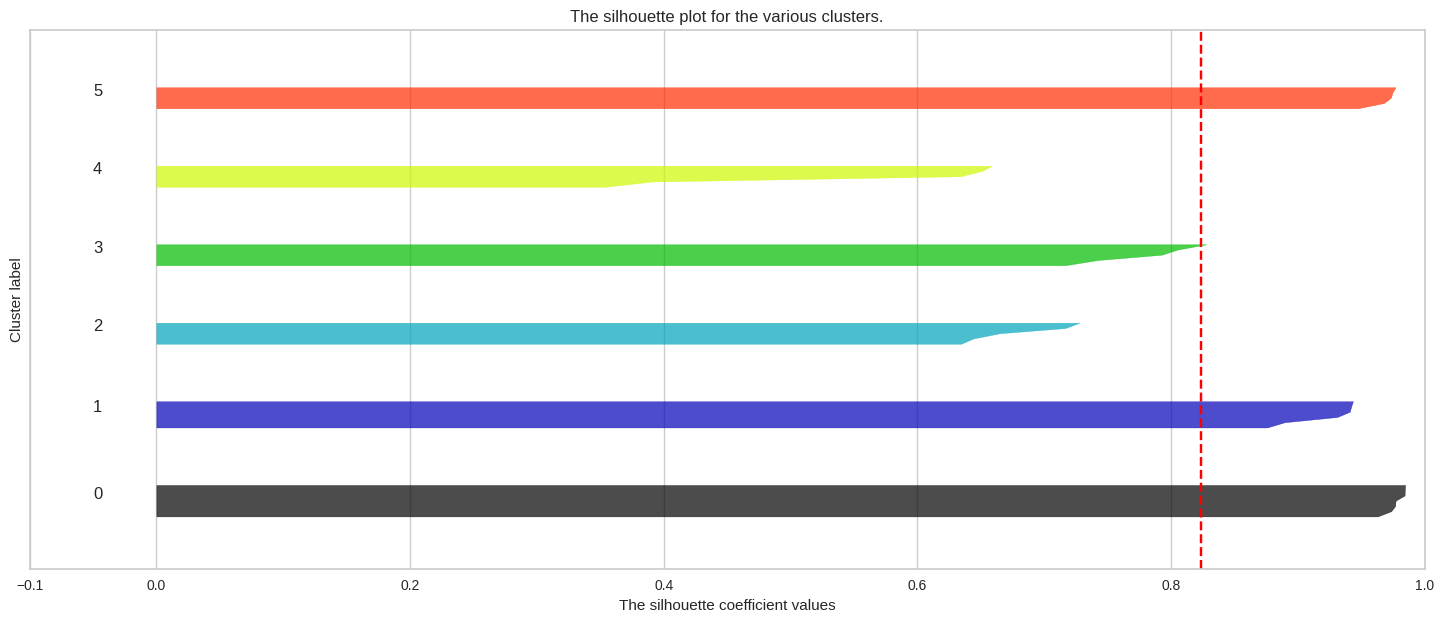

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def plot_silhouette(n_clusters, data, cluster_labels):
    """
    Побудова силуетних діаграм для кластеризації.

    Параметри:
    - n_clusters: кількість кластерів (без урахування викидів)
    - data: масштабовані дані (DataFrame або масив)
    - cluster_labels: мітки кластерів (масив)
    """
    # Виключення викидів із міткою -1
    mask = cluster_labels != -1
    filtered_data = data[mask]
    filtered_labels = cluster_labels[mask]

    # Перевірка наявності кластерів
    if len(np.unique(filtered_labels)) < 2:
        print("Недостатньо кластерів для побудови силуетної діаграми.")
        return

    # Обчислення середнього силуетного коефіцієнта
    silhouette_avg = silhouette_score(filtered_data, filtered_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Обчислення силуетних значень для кожної точки
    sample_silhouette_values = silhouette_samples(filtered_data, filtered_labels)

    # Створення графіку
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(filtered_data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Силуетні значення для поточного кластеру
        ith_cluster_silhouette_values = sample_silhouette_values[filtered_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Переход до наступного кластеру

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Масштабовані дані та мітки кластерів
mask = dbscan.labels_ != -1
filtered_data = df_scaled[mask]  # Масштабовані дані без викидів
filtered_labels = dbscan.labels_[mask]  # Мітки кластерів без викидів

# Побудова силуетної діаграми
plot_silhouette(
    n_clusters=len(np.unique(filtered_labels)),  # Кількість кластерів без викидів
    data=filtered_data,  # Масштабовані дані без викидів
    cluster_labels=filtered_labels,  # Мітки кластерів без викидів
)